# Sentiment Classification with DistilBERT

## Custom training loop including gradient clipping


In [ ]:
import sys, os
sys.path.append(os.path.abspath(".."))
import pandas as pd
from sklearn.metrics import classification_report
import src.analysis as analysis

In [2]:
df = pd.read_csv("../plots/predictions.csv")
df.head()

,text,label,pred,prob_pos
0,I love sci-fi and am willing to put up with a ...,0,0,0.002718
1,"Worth the entertainment value of a rental, esp...",0,0,0.013174
2,its a totally average film with a few semi-alr...,0,0,0.005309
3,STAR RATING: ***** Saturday Night **** Friday ...,0,0,0.002850
4,"First off let me say, If you haven't enjoyed a...",0,1,0.994341


## Basic metrics


In [3]:
print(classification_report(df["label"], df["pred"], target_names=["NEGATIVE", "POSITIVE"]))

              precision    recall  f1-score   support

    NEGATIVE       0.94      0.92      0.93     12500
    POSITIVE       0.92      0.94      0.93     12500

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



## Plots

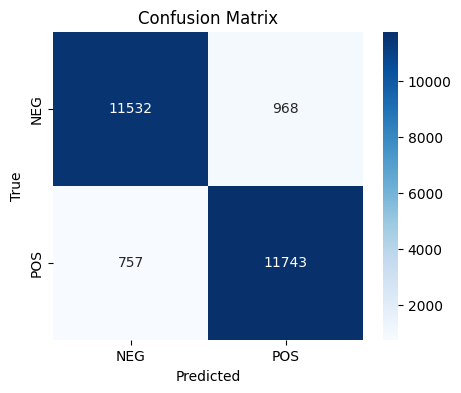

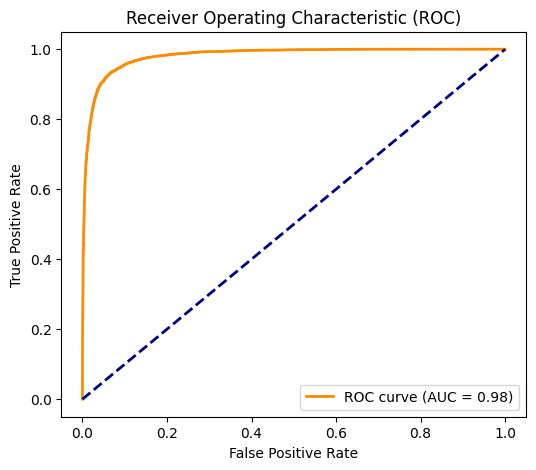

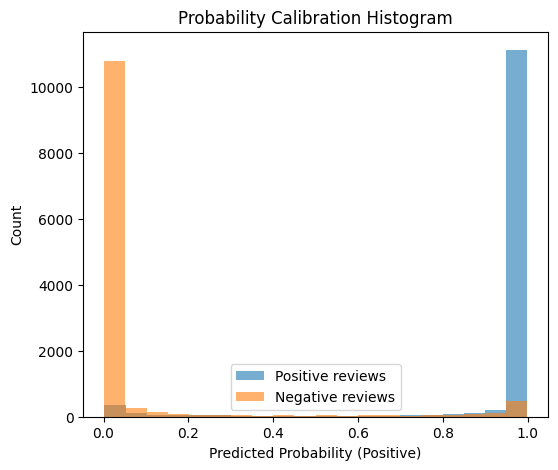

In [8]:

analysis.plot_confusion_matrix(df)
analysis.plot_roc_curve(df)
analysis.plot_probability_histogram(df)


## Inspect Errors 

In [4]:
analysis.show_misclassified_examples(df, n=5)



 Showing 5 misclassified examples:

True: NEG, Pred: POS, Prob: 0.65
Text: "Scientists at a remote lab experiment on (insert scaly creature here) and create out of control monsters. In the meantime a crack military team/the scientist's daughter/bank robbers find their way to the remote place and are menaced by the giant critters. One by one they're eaten, all during an "ex...

True: POS, Pred: NEG, Prob: 0.19
Text: Being a self confessed slasher addict means that it's very rare that I get the chance to review many bigger budgeted movies with creditable casts. Aside from James Mangold's successful box office draw Identity; there have not been any big name entries since the Scream trilogy once again put Wes Crav...

True: POS, Pred: NEG, Prob: 0.01
Text: Well, on the day that Rob Schneider plunges himself further into the black hole of notoriously bad movies by starring in the absolutely not-at-all-wanted "Deuce Bigalow: European Gigolo" (hmmmm....wasn't there a film called Roadtrip whi

## Conclusion 

- Accuracy ~93%
- ROC AUC ~0.96
- Errors are mostly mixed or ambiguous reviews